In [10]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

During the lecture, we learned about a new type of models - Decision Trees. They work by asking simple questions about the features in your dataset, and build a regressor/classifier by sequentially combining these questions.

In this lab, we are to get more familiar with decision trees, and learn to implement them aswell.

---

## Challanges

**Task 1**

Before we proceed with decision trees, have a readthrough of [this](https://www.kaggle.com/code/shirazumlintraminhaghjou/titanic-prediction-90-accuracy) Kaggle notebook. It contains some interesting feature engineering for the Titanic dataset we worked with last week. See if you can learn something cool.

*Note*: The title of the notebook is clickbaity.

**Task 2**

Now go back to your last lab, where we trained a logistic regression model to predict survivability of passangers. Now also initialize and train a decision tree classifier for the same task, using the same features you used for logistic regression. You don't have to give the model any particular arguments when initializing, it's simply sufficient with the following:

In [148]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
df = pd.read_csv('titanic.csv')


In [149]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [150]:
df.drop(columns=['Ticket','Cabin','Name'], inplace=True)

In [151]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [152]:
df = pd.get_dummies(df, columns=['Embarked'], dtype=int) 


In [153]:
df['Sex'] = [1 if sex == 'male' else 0 for sex in df['Sex']]

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X, y = df.drop(columns=['Survived']).values, df['Survived'].values


# Build and train the decision tree classifier
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7867564534231201


In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into features (X) and target variable (y)
X, y = df.drop(columns=['Survived']).values, df['Survived'].values

# Build the decision tree classifier

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]
Mean CV Accuracy: 0.7867365513778168


In [156]:
y = y.reshape(-1,1)


Remember to cross-validate your results. 

After your trained your tree, try this code. What do you see?

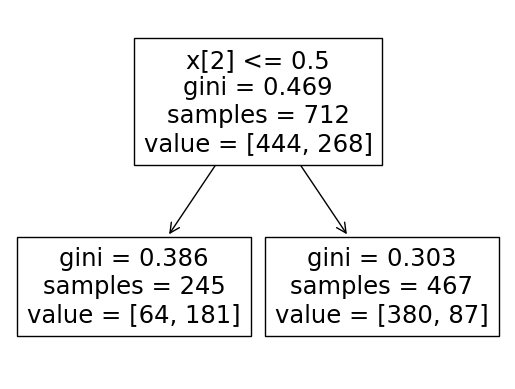

In [169]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(model)
plt.show()

*Note*: 

Decision Tree's are **not** sensitive to scale differences between features, you therefore do not need to conduct feature scaling as a preperation for training decision tree's. 

Although it wouldn't hurt if you did - in fact, it would't affect the performance whatsoever.

**Task 3**

As we also discussed in the lecture, the number of Decision Nodes in a Tree highly influences it's performance. Too few, and you'll under - too many, and you'll overfit.

Now, do the same task as in Task 2, but this time try initializing your model with different allowed maximum depths. For example, for a max depth of 1:

In [158]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)

Try different values of max_depth and see which one yields best performance. Remember to cross validate each time!

**Task 4**

Read more about the different parameters you can provide to adjust your tree's by reading the official documentation

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Decison Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

See if you find anything interesting you'd like to experiment with. There is much too learn about trees!